Mean Absolute Error (MAE): 0.629908653009376
R² Score: 0.45885918903846656
Coefficient (Slope): [0.41933849]
Intercept: 0.44459729169078677


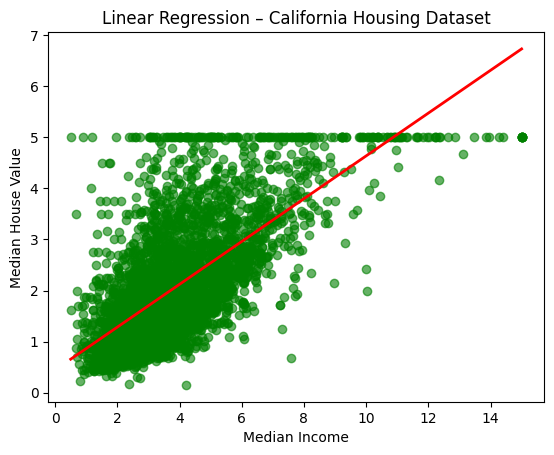

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedHouseValue"] = data.target

# Use one feature for clear scatter plot
X = df[["MedInc"]]          # Median Income
y = df["MedHouseValue"]     # Median House Value

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))
print("Coefficient (Slope):", model.coef_)
print("Intercept:", model.intercept_)

# Sort values for straight regression line
X_test_sorted = X_test.sort_values(by="MedInc")
y_pred_sorted = model.predict(X_test_sorted)

plt.scatter(X_test, y_test, color='green', alpha=0.6)
plt.plot(X_test_sorted, y_pred_sorted, linewidth=2, color='red', label="Regression Line")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Linear Regression – California Housing Dataset")
plt.show()
